In [5]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.utils import np_utils
from keras.datasets import mnist

# 비지도학습

## auto encoder: 압축했다가 펼치면서 noise없앰

### autoencoder 예시1

In [28]:
#이 예시 673p 로 불러들이기
from keras.layers import Input
from keras.models import Model
import numpy as np
encoding_dim=3 #3차원으로 인코딩
x_train=np.array([[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3]])
#1,2,3 이 8번 있음
input=Input(shape=(3,))
encoded=Dense(encoding_dim,activation='relu')(input)
decoded=Dense(3,activation='linear')(encoded)
autoencoder=Model(input,decoded) #최종적으로 input이 들어와서 인코딩 함
autoencoder.compile(optimizer='adadelta',loss='mse')
autoencoder.fit(x_train,x_train,epochs=3000, batch_size=4)

#원래는 1,2,3 이었으므로 학습을 잘 했다고 할 수 있음

Epoch 1/3000
8/8 [==============================] - 0s 13ms/step - loss: 16.7791
Epoch 2/3000
8/8 [==============================] - 0s 249us/step - loss: 16.5934
Epoch 3/3000
8/8 [==============================] - 0s 249us/step - loss: 16.4091
Epoch 4/3000
8/8 [==============================] - 0s 128us/step - loss: 16.2273
Epoch 5/3000
8/8 [==============================] - 0s 249us/step - loss: 16.0484
Epoch 6/3000
8/8 [==============================] - 0s 246us/step - loss: 15.8726
Epoch 7/3000
8/8 [==============================] - 0s 245us/step - loss: 15.6998
Epoch 8/3000
8/8 [==============================] - 0s 249us/step - loss: 15.5301
Epoch 9/3000
8/8 [==============================] - 0s 249us/step - loss: 15.3633
Epoch 10/3000
8/8 [==============================] - 0s 249us/step - loss: 15.1993
Epoch 11/3000
8/8 [==============================] - 0s 374us/step - loss: 15.0382
Epoch 12/3000
8/8 [==============================] - 0s 374us/step - loss: 14.8798
Epoch 13/3000


8/8 [==============================] - 0s 249us/step - loss: 3.6723
Epoch 199/3000
8/8 [==============================] - 0s 249us/step - loss: 3.6508
Epoch 200/3000
8/8 [==============================] - 0s 374us/step - loss: 3.6295
Epoch 201/3000
8/8 [==============================] - 0s 249us/step - loss: 3.6084
Epoch 202/3000
8/8 [==============================] - 0s 249us/step - loss: 3.5874
Epoch 203/3000
8/8 [==============================] - 0s 249us/step - loss: 3.5666
Epoch 204/3000
8/8 [==============================] - 0s 249us/step - loss: 3.5460
Epoch 205/3000
8/8 [==============================] - 0s 249us/step - loss: 3.5256
Epoch 206/3000
8/8 [==============================] - 0s 249us/step - loss: 3.5053
Epoch 207/3000
8/8 [==============================] - 0s 249us/step - loss: 3.4852
Epoch 208/3000
8/8 [==============================] - 0s 249us/step - loss: 3.4653
Epoch 209/3000
8/8 [==============================] - 0s 249us/step - loss: 3.4456
Epoch 210/3000
8/8 

8/8 [==============================] - 0s 249us/step - loss: 1.5246
Epoch 395/3000
8/8 [==============================] - 0s 250us/step - loss: 1.5187
Epoch 396/3000
8/8 [==============================] - 0s 249us/step - loss: 1.5128
Epoch 397/3000
8/8 [==============================] - 0s 125us/step - loss: 1.5068
Epoch 398/3000
8/8 [==============================] - 0s 249us/step - loss: 1.5009
Epoch 399/3000
8/8 [==============================] - 0s 249us/step - loss: 1.4951
Epoch 400/3000
8/8 [==============================] - 0s 249us/step - loss: 1.4892
Epoch 401/3000
8/8 [==============================] - 0s 249us/step - loss: 1.4833
Epoch 402/3000
8/8 [==============================] - 0s 249us/step - loss: 1.4774
Epoch 403/3000
8/8 [==============================] - 0s 249us/step - loss: 1.4716
Epoch 404/3000
8/8 [==============================] - 0s 249us/step - loss: 1.4657
Epoch 405/3000
8/8 [==============================] - 0s 249us/step - loss: 1.4599
Epoch 406/3000
8/8 

8/8 [==============================] - 0s 249us/step - loss: 5.4230e-10
Epoch 589/3000
8/8 [==============================] - 0s 125us/step - loss: 3.6366e-10
Epoch 590/3000
8/8 [==============================] - 0s 250us/step - loss: 3.2867e-10
Epoch 591/3000
8/8 [==============================] - 0s 125us/step - loss: 1.5764e-09
Epoch 592/3000
8/8 [==============================] - 0s 249us/step - loss: 2.5016e-08
Epoch 593/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5049e-07
Epoch 594/3000
8/8 [==============================] - 0s 249us/step - loss: 2.4448e-06
Epoch 595/3000
8/8 [==============================] - 0s 249us/step - loss: 3.6571e-06
Epoch 596/3000
8/8 [==============================] - 0s 249us/step - loss: 4.1824e-06
Epoch 597/3000
8/8 [==============================] - 0s 374us/step - loss: 4.5935e-06
Epoch 598/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9794e-06
Epoch 599/3000
8/8 [==============================] - 0s 2

8/8 [==============================] - 0s 249us/step - loss: 3.0776e-04
Epoch 777/3000
8/8 [==============================] - 0s 249us/step - loss: 3.0896e-04
Epoch 778/3000
8/8 [==============================] - 0s 374us/step - loss: 3.1016e-04
Epoch 779/3000
8/8 [==============================] - 0s 249us/step - loss: 3.1135e-04
Epoch 780/3000
8/8 [==============================] - 0s 249us/step - loss: 3.1253e-04
Epoch 781/3000
8/8 [==============================] - 0s 374us/step - loss: 3.1370e-04
Epoch 782/3000
8/8 [==============================] - 0s 249us/step - loss: 3.1487e-04
Epoch 783/3000
8/8 [==============================] - 0s 125us/step - loss: 3.1603e-04
Epoch 784/3000
8/8 [==============================] - 0s 125us/step - loss: 3.1719e-04
Epoch 785/3000
8/8 [==============================] - 0s 249us/step - loss: 3.1834e-04
Epoch 786/3000
8/8 [==============================] - 0s 249us/step - loss: 3.1948e-04
Epoch 787/3000
8/8 [==============================] - 0s 2

8/8 [==============================] - 0s 249us/step - loss: 4.4660e-04
Epoch 965/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4702e-04
Epoch 966/3000
8/8 [==============================] - 0s 125us/step - loss: 4.4744e-04
Epoch 967/3000
8/8 [==============================] - 0s 125us/step - loss: 4.4786e-04
Epoch 968/3000
8/8 [==============================] - 0s 125us/step - loss: 4.4828e-04
Epoch 969/3000
8/8 [==============================] - 0s 250us/step - loss: 4.4869e-04
Epoch 970/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4911e-04
Epoch 971/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4952e-04
Epoch 972/3000
8/8 [==============================] - 0s 374us/step - loss: 4.4992e-04
Epoch 973/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5032e-04
Epoch 974/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5073e-04
Epoch 975/3000
8/8 [==============================] - 0s 1

Epoch 1150/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9654e-04
Epoch 1151/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9667e-04
Epoch 1152/3000
8/8 [==============================] - 0s 125us/step - loss: 4.9683e-04
Epoch 1153/3000
8/8 [==============================] - 0s 374us/step - loss: 4.9698e-04
Epoch 1154/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9713e-04
Epoch 1155/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9728e-04
Epoch 1156/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9743e-04
Epoch 1157/3000
8/8 [==============================] - 0s 250us/step - loss: 4.9758e-04
Epoch 1158/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9772e-04
Epoch 1159/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9786e-04
Epoch 1160/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9800e-04
Epoch 1161/3000
8/8 [===========

8/8 [==============================] - 0s 125us/step - loss: 5.0680e-04
Epoch 1244/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0687e-04
Epoch 1245/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0696e-04
Epoch 1246/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0703e-04
Epoch 1247/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0710e-04
Epoch 1248/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0716e-04
Epoch 1249/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0724e-04
Epoch 1250/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0731e-04
Epoch 1251/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0738e-04
Epoch 1252/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0745e-04
Epoch 1253/3000
8/8 [==============================] - 0s 125us/step - loss: 5.0752e-04
Epoch 1254/3000
8/8 [===========================

8/8 [==============================] - 0s 249us/step - loss: 5.1169e-04
Epoch 1430/3000
8/8 [==============================] - 0s 125us/step - loss: 5.1168e-04
Epoch 1431/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1168e-04
Epoch 1432/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1166e-04
Epoch 1433/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1164e-04
Epoch 1434/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1162e-04
Epoch 1435/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1161e-04
Epoch 1436/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1159e-04
Epoch 1437/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1158e-04
Epoch 1438/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1157e-04
Epoch 1439/3000
8/8 [==============================] - 0s 249us/step - loss: 5.1155e-04
Epoch 1440/3000
8/8 [===========================

8/8 [==============================] - 0s 249us/step - loss: 5.0528e-04
Epoch 1616/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0523e-04
Epoch 1617/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0518e-04
Epoch 1618/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0513e-04
Epoch 1619/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0508e-04
Epoch 1620/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0503e-04
Epoch 1621/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0498e-04
Epoch 1622/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0492e-04
Epoch 1623/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0487e-04
Epoch 1624/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0481e-04
Epoch 1625/3000
8/8 [==============================] - 0s 249us/step - loss: 5.0476e-04
Epoch 1626/3000
8/8 [===========================

Epoch 1708/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9996e-04
Epoch 1709/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9990e-04
Epoch 1710/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9983e-04
Epoch 1711/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9978e-04
Epoch 1712/3000
8/8 [==============================] - 0s 125us/step - loss: 4.9972e-04
Epoch 1713/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9966e-04
Epoch 1714/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9960e-04
Epoch 1715/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9954e-04
Epoch 1716/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9947e-04
Epoch 1717/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9941e-04
Epoch 1718/3000
8/8 [==============================] - 0s 125us/step - loss: 4.9935e-04
Epoch 1719/3000
8/8 [===========

8/8 [==============================] - 0s 249us/step - loss: 4.9385e-04
Epoch 1802/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9377e-04
Epoch 1803/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9370e-04
Epoch 1804/3000
8/8 [==============================] - 0s 374us/step - loss: 4.9363e-04
Epoch 1805/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9356e-04
Epoch 1806/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9349e-04
Epoch 1807/3000
8/8 [==============================] - 0s 374us/step - loss: 4.9342e-04
Epoch 1808/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9335e-04
Epoch 1809/3000
8/8 [==============================] - 0s 125us/step - loss: 4.9328e-04
Epoch 1810/3000
8/8 [==============================] - 0s 249us/step - loss: 4.9322e-04
Epoch 1811/3000
8/8 [==============================] - 0s 125us/step - loss: 4.9315e-04
Epoch 1812/3000
8/8 [===========================

Epoch 1987/3000
8/8 [==============================] - 0s 249us/step - loss: 4.8029e-04
Epoch 1988/3000
8/8 [==============================] - 0s 250us/step - loss: 4.8021e-04
Epoch 1989/3000
8/8 [==============================] - 0s 249us/step - loss: 4.8013e-04
Epoch 1990/3000
8/8 [==============================] - 0s 249us/step - loss: 4.8005e-04
Epoch 1991/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7998e-04
Epoch 1992/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7991e-04
Epoch 1993/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7984e-04
Epoch 1994/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7977e-04
Epoch 1995/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7968e-04
Epoch 1996/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7961e-04
Epoch 1997/3000
8/8 [==============================] - 0s 125us/step - loss: 4.7953e-04
Epoch 1998/3000
8/8 [===========

8/8 [==============================] - 0s 249us/step - loss: 4.7310e-04
Epoch 2081/3000
8/8 [==============================] - 0s 374us/step - loss: 4.7302e-04
Epoch 2082/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7294e-04
Epoch 2083/3000
8/8 [==============================] - 0s 125us/step - loss: 4.7287e-04
Epoch 2084/3000
8/8 [==============================] - 0s 125us/step - loss: 4.7280e-04
Epoch 2085/3000
8/8 [==============================] - 0s 250us/step - loss: 4.7271e-04
Epoch 2086/3000
8/8 [==============================] - 0s 125us/step - loss: 4.7263e-04
Epoch 2087/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7255e-04
Epoch 2088/3000
8/8 [==============================] - 0s 125us/step - loss: 4.7248e-04
Epoch 2089/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7240e-04
Epoch 2090/3000
8/8 [==============================] - 0s 249us/step - loss: 4.7233e-04
Epoch 2091/3000
8/8 [===========================

8/8 [==============================] - 0s 249us/step - loss: 4.5849e-04
Epoch 2267/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5842e-04
Epoch 2268/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5834e-04
Epoch 2269/3000
8/8 [==============================] - 0s 125us/step - loss: 4.5826e-04
Epoch 2270/3000
8/8 [==============================] - 0s 125us/step - loss: 4.5818e-04
Epoch 2271/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5809e-04
Epoch 2272/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5801e-04
Epoch 2273/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5793e-04
Epoch 2274/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5786e-04
Epoch 2275/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5777e-04
Epoch 2276/3000
8/8 [==============================] - 0s 249us/step - loss: 4.5768e-04
Epoch 2277/3000
8/8 [===========================

Epoch 2452/3000
8/8 [==============================] - 0s 125us/step - loss: 4.4366e-04
Epoch 2453/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4358e-04
Epoch 2454/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4350e-04
Epoch 2455/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4342e-04
Epoch 2456/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4335e-04
Epoch 2457/3000
8/8 [==============================] - 0s 250us/step - loss: 4.4327e-04
Epoch 2458/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4318e-04
Epoch 2459/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4310e-04
Epoch 2460/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4302e-04
Epoch 2461/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4294e-04
Epoch 2462/3000
8/8 [==============================] - 0s 249us/step - loss: 4.4286e-04
Epoch 2463/3000
8/8 [===========

8/8 [==============================] - 0s 249us/step - loss: 4.3626e-04
Epoch 2546/3000
8/8 [==============================] - 0s 125us/step - loss: 4.3619e-04
Epoch 2547/3000
8/8 [==============================] - 0s 249us/step - loss: 4.3612e-04
Epoch 2548/3000
8/8 [==============================] - 0s 249us/step - loss: 4.3604e-04
Epoch 2549/3000
8/8 [==============================] - 0s 374us/step - loss: 4.3595e-04
Epoch 2550/3000
8/8 [==============================] - 0s 249us/step - loss: 4.3587e-04
Epoch 2551/3000
8/8 [==============================] - 0s 249us/step - loss: 4.3579e-04
Epoch 2552/3000
8/8 [==============================] - 0s 249us/step - loss: 4.3572e-04
Epoch 2553/3000
8/8 [==============================] - 0s 374us/step - loss: 4.3564e-04
Epoch 2554/3000
8/8 [==============================] - 0s 249us/step - loss: 4.3556e-04
Epoch 2555/3000
8/8 [==============================] - 0s 125us/step - loss: 4.3549e-04
Epoch 2556/3000
8/8 [===========================

Epoch 2638/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2887e-04
Epoch 2639/3000
8/8 [==============================] - 0s 250us/step - loss: 4.2880e-04
Epoch 2640/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2872e-04
Epoch 2641/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2865e-04
Epoch 2642/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2857e-04
Epoch 2643/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2849e-04
Epoch 2644/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2842e-04
Epoch 2645/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2834e-04
Epoch 2646/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2826e-04
Epoch 2647/3000
8/8 [==============================] - 0s 249us/step - loss: 4.2818e-04
Epoch 2648/3000
8/8 [==============================] - 0s 125us/step - loss: 4.2810e-04
Epoch 2649/3000
8/8 [===========

8/8 [==============================] - 0s 249us/step - loss: 4.1438e-04
Epoch 2823/3000
8/8 [==============================] - 0s 249us/step - loss: 4.1431e-04
Epoch 2824/3000
8/8 [==============================] - 0s 125us/step - loss: 4.1423e-04
Epoch 2825/3000
8/8 [==============================] - 0s 125us/step - loss: 4.1416e-04
Epoch 2826/3000
8/8 [==============================] - 0s 374us/step - loss: 4.1408e-04
Epoch 2827/3000
8/8 [==============================] - 0s 125us/step - loss: 4.1400e-04
Epoch 2828/3000
8/8 [==============================] - 0s 249us/step - loss: 4.1392e-04
Epoch 2829/3000
8/8 [==============================] - 0s 249us/step - loss: 4.1384e-04
Epoch 2830/3000
8/8 [==============================] - 0s 249us/step - loss: 4.1377e-04
Epoch 2831/3000
8/8 [==============================] - 0s 125us/step - loss: 4.1369e-04
Epoch 2832/3000
8/8 [==============================] - 0s 249us/step - loss: 4.1360e-04
Epoch 2833/3000
8/8 [===========================

In [29]:
print(autoencoder.predict(x_train))

[[1.0118277 2.0184293 3.0264537]
 [1.0118277 2.0184293 3.0264537]
 [1.0118277 2.0184293 3.0264537]
 [1.0118277 2.0184293 3.0264537]
 [1.0118277 2.0184293 3.0264537]
 [1.0118277 2.0184293 3.0264537]
 [1.0118277 2.0184293 3.0264537]
 [1.0118277 2.0184293 3.0264537]]


### autoencoder 손글씨데이터 이용

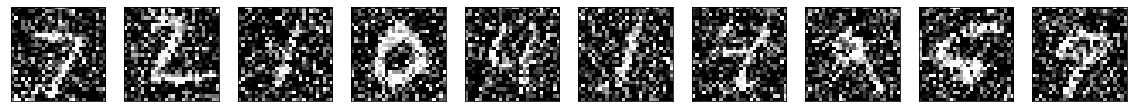

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2654 - val_loss: 0.1980
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1806 - val_loss: 0.1672
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1631 - val_loss: 0.1573
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1541 - val_loss: 0.1494
Epoch 5/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1474 - val_loss: 0.1439
Epoch 6/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1430 - val_loss: 0.1402
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1398 - val_loss: 0.1375
Epoch 8/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.1369 - val_loss: 0.1353
Epoch 9/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.1345 - val_loss: 0.1334
Epoch

In [45]:
%%time
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential

(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
x_train=np.reshape(x_train,(len(x_train),784))
x_test=np.reshape(x_test,(len(x_test),784))
#비지도 학습이 끝난 후에 노이즈가 잘 제거 됐는지
#원본 데이터에 noise추가
noise_factor=0.5
x_train_noisy=x_train + noise_factor*np.random.normal(loc=0.0,scale=1.0,
                                                     size=x_train.shape)

x_test_noisy=x_test + noise_factor*np.random.normal(loc=0.0,scale=1.0,
                                                     size=x_test.shape)
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)
n=10
plt.figure(figsize=(20,2)) #가로20, 세로 2
for i in range(n):
    ax=plt.subplot(1,n,(i+1)) #101~110
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#모델 구서
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=784)) #input_shape=(784,)
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(784,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

epochs=10
model.fit(x_train_noisy,x_train,epochs=epochs,batch_size=256,shuffle=True,
         validation_data=(x_test_noisy,x_test))

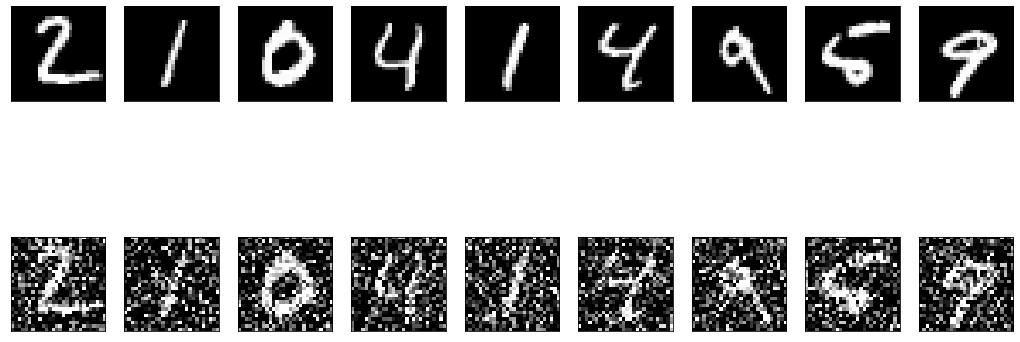

In [55]:
#결과 확인
decoded_imgs=model.predict(x_test)
n=10
plt.figure(figsize=(20,6))
for i in range(1,n):
    #display origin
    ax=plt.subplot(3,n,(i+1))
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #display noisy
    ax=plt.subplot(3,n,(i+2*n+1))
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #display reconstruction
    ax=plt.subplot(3,n,(i+2*n+1))
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 실생활 예

노이즈 캔슬링에 이용될 수 있음

카드의 부정 사용 

블랙박스

자율주행 자동차

일반적으로 DNN은 같은 크기를 쓴다.

## 페암 수술 환자 생존 예측-케라스 말고 텐서플로우로

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from keras.models import Sequential
from keras.layers import Dense

In [79]:
#재현성
import tensorflow as tf
seed=0 #재현성
np.random.seed(seed)
tf.set_random_seed(seed)

data_set=np.loadtxt('C:/Users/User/study_ai/datasets/ThoraricSurgery.csv',delimiter=',')
print(data_set.shape)

X=data_set[:,0:17]
Y=data_set[:,17]

model=Sequential()
model.add(Dense(30,input_dim=17,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.fit(X,Y,epochs=30, batch_size=10)
score=model.evaluate(X,Y)
print(score[0]) #loss
print(score[1]*100) #accuracy


(470, 18)
Epoch 1/30
470/470 [==============================] - 0s 564us/step - loss: 0.6616 - acc: 0.3149
Epoch 2/30
470/470 [==============================] - 0s 57us/step - loss: 0.1488 - acc: 0.8511
Epoch 3/30
470/470 [==============================] - 0s 62us/step - loss: 0.1488 - acc: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 55us/step - loss: 0.1488 - acc: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 51us/step - loss: 0.1488 - acc: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 55us/step - loss: 0.1487 - acc: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 55us/step - loss: 0.1487 - acc: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 55us/step - loss: 0.1487 - acc: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 55us/step - loss: 0.1487 - acc: 0.8511
Epoch 10/30
470/470 [==============================] - 0s 55us/step - loss: 0.1486 - acc: 0.8511
Epoch 11/30
470/470 [=======

## 모델 저장과 EarlyStopping

1. 모델 저장

2. early stopping
train loss는 감소, test loss는 감소하다가 증가. -> 더이상 떨어지지 않으면 멈춰라

In [107]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint #new
from keras.callbacks import EarlyStopping  #new

### 동기와 비동기

동기: 순차적으로 실행한다.

비동기: a 가 return 되기 전에 b return 가능

In [110]:
seed=0
np.random.seed(seed)
tf.set_random_seed(seed)
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(x_train.shape[0],28,28,1) #1은 흑백
x_test=x_test.reshape(x_test.shape[0],28,28,1)
#스케일링
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

import os
MODEL_DIR='model_mnist'
if not os.path.exists(MODEL_DIR): #폴더가 없으면만들고, 없으면 그냥 통과
    os.mkdir(MODEL_DIR)

model_path=MODEL_DIR + '{epoch:02d}-{val_loss:.4f}.h5' 
#                     둘째자리 정수   소수 넷째자리
check_pointer=ModelCheckpoint(filepath=model_path,monitor='val_loss',
                             save_best_only=True,verbose=1)
#관심있는것은 val_loss. verbose: 상세하게
early_stopper=EarlyStopping(monitor='val_loss',patience=3) #patience: val_loss가 언제까지 떨어지는지
#10번까지만 지켜봄


In [111]:
%%time
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50,
                batch_size=200, callbacks=[check_pointer, early_stopper])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 88s 1ms/step - loss: 0.2851 - acc: 0.9147 - val_loss: 0.0572 - val_acc: 0.9818

Epoch 00001: val_loss improved from inf to 0.05718, saving model to model_mnist01-0.0572.h5
Epoch 2/50
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0897 - acc: 0.9733 - val_loss: 0.0381 - val_acc: 0.9866

Epoch 00002: val_loss improved from 0.05718 to 0.03809, saving model to model_mnist02-0.0381.h5
Epoch 3/50
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0678 - acc: 0.9790 - val_loss: 0.0377 - val_acc: 0.9878

Epoch 00003: val_loss improved from 0.03809 to 0.03772, saving model to model_mnist03-0.0377.h5
Epoch 4/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0561 - acc: 0.9830 - val_loss: 0.0306 - val_acc: 0.9899

Epoch 00004: val_loss improved from 0.03772 to 0.03057, saving model to model_mnist04-0.0306.h5
Epoch 5/50
60000/6

In [112]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
__________

In [115]:
score=model.evaluate(x_test,y_test)
print('test loss: {:.4f}'.format(score[0]*100))
print('test acc: {:.4f}'.format(score[1]))

10000/10000 [==============================] - 3s 263us/step
test loss: 2.8534
test acc: 0.9918


In [116]:
y_vloss=hist.histroy['val_loss']
y_loss=hist.history['loss']
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_loss,marker=',',color='red',label='test loss')
plt.plot(x_len,y_loss,marker=',',color='blue',label='train_loss')
plt.legend(loc='upper right')
plt.show()

AttributeError: 'History' object has no attribute 'histroy'